# Programming Exercise 1: Linear Regression
## 2 Linear regression with one variable
### 2.1 Plotting the Data

In [1]:
import numpy as np
import matplotlib.pyplot as mtp

# data = load('ex1data1.txt')
# X = data(:, 1) 
# y = data(:, 2)
# m = length(y)
# code to load data from file to variables

data = np.loadtxt('ex1data1.txt', delimiter=",")
x = data[:, 0]
y = data[:, 1]
m = np.size(y)

Text(0.5, 0, 'Population of City in 10,000s')

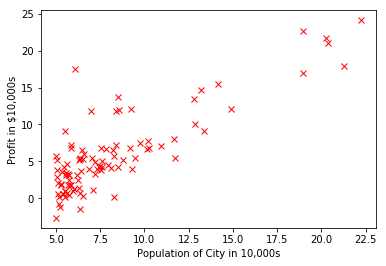

In [2]:
# plot(x, y, 'rx', 'MarkerSize', 10);
# ylabel('Profit in $10,000s');
# xlabel('Population of City in 10,000s');
# code to plot data on a Scatter plot

mtp.plot(x, y, 'rx')
mtp.ylabel('Profit in $10,000s')
mtp.xlabel('Population of City in 10,000s')

### 2.2 Gradient Descent

#### 2.2.3 Computing the cost J(θ)

In [3]:
# preparing data

X = np.c_[np.ones(m),  data[:, 0]]
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

In [4]:
# compute
def computeCost (X, y, theta):
    h = X.dot(theta)
    quadErr = np.square(h-y)
    return 1/(2*m) * sum(quadErr)
    
print(computeCost(X, y, theta))
print(computeCost(X, y, [-1 , 2]))

32.072733877455654
54.24245508201238


#### 2.2.4 Gradient descent

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = np.size(y);
    J_history = np.zeros(num_iters)
    
    for iter in range(0, num_iters):
        err = X.dot(theta) - y
                                            #         tt1 = err * X[:, 0]
                                            #         tt2 = err * X[:, 1]      
                                            #         theta[0] = theta[0] - (alpha/m) * np.sum(tt1)
                                            #         theta[1] = theta[1] - (alpha/m) * np.sum(tt2)
        theta = theta - (alpha/m) * (err.dot(X))
        # theta = theta - (alpha/m) * np.transpose(np.transpose(err).dot(X))
        
        J_history[iter] = computeCost(X, y, theta)
    
    d = dict();  
    d['theta'] = theta
    d['J_History'] = J_history
    return d 

ret = gradientDescent(X, y, theta, alpha, iterations)
theta = ret['theta']
print(theta)

predict1 = np.array([1, 3.5]).dot(theta) #for population 35000 
print(predict1*10000)

predict1 = np.array([1, 7]).dot(theta) #for population 70000 
print(predict1*10000)


[-3.63029144  1.16636235]
4519.7678677017675
45342.45012944712


## 2.3 Debugging

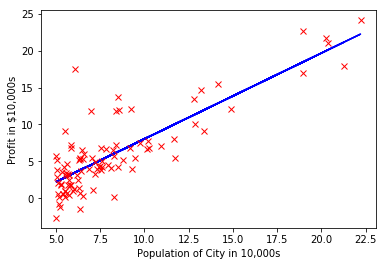

In [6]:
mtp.plot(X[:, 1], X.dot(theta), 'b-')
mtp.plot(x, y, 'rx');
mtp.ylabel('Profit in $10,000s');
mtp.xlabel('Population of City in 10,000s');

## 2.4 Visualizing J(θ)

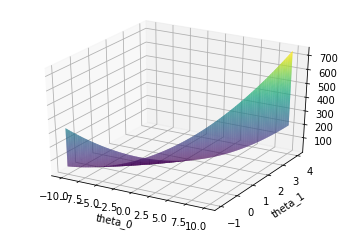

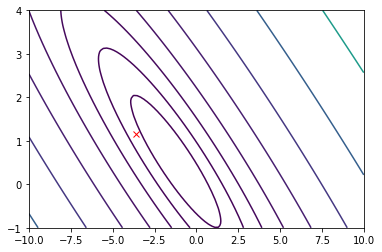

In [19]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t =np.array( [theta0_vals[i], theta1_vals[j]] )
        J_vals[i,j] = computeCost(X, y, t)


from mpl_toolkits import mplot3d

surface = mtp.axes(projection='3d')
mtp.figure(1)
surface.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
mtp.xlabel('theta_0')
mtp.ylabel('theta_1')

mtp.figure(2)
contour = mtp.subplot()
contour.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
mtp.plot(theta[0], theta[1], 'rx');

####### there still is a problem